# Project 2. Bipedal Walker v3 Model Training using RL

In [2]:
!pip install torch gym numpy matplotlib

  Using cached torch-2.5.1-cp312-cp312-win_amd64.whl.metadata (28 kB)
  Using cached sympy-1.13.1-py3-none-any.whl.metadata (12 kB)
   ---------------------------------------- 0.0/203.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/203.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/203.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/203.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/203.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/203.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/203.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/203.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/203.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/203.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/203.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/203.0 MB ? eta -:--:--
   -------------

In [13]:
!pip install gymnasium



   ---------------------------------------- 0.0/958.1 kB ? eta -:--:--
   ---------------------------------------- 10.2/958.1 kB ? eta -:--:--
    -------------------------------------- 20.5/958.1 kB 330.3 kB/s eta 0:00:03
   - ------------------------------------- 30.7/958.1 kB 262.6 kB/s eta 0:00:04
   - ------------------------------------- 41.0/958.1 kB 245.8 kB/s eta 0:00:04
   -- ------------------------------------ 71.7/958.1 kB 357.2 kB/s eta 0:00:03
   ---- --------------------------------- 122.9/958.1 kB 516.7 kB/s eta 0:00:02
   ------ ------------------------------- 174.1/958.1 kB 618.3 kB/s eta 0:00:02
   -------- ----------------------------- 204.8/958.1 kB 593.2 kB/s eta 0:00:02
   ---------- --------------------------- 256.0/958.1 kB 684.6 kB/s eta 0:00:02
   ----------- -------------------------- 286.7/958.1 kB 681.0 kB/s eta 0:00:01
   ------------ ------------------------- 317.4/958.1 kB 678.1 kB/s eta 0:00:01
   ------------- ------------------------ 337.9/958.1 kB 

In [17]:
!pip install swig

   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.6 MB 165.2 kB/s eta 0:00:16
   ---------------------------------------- 0.0/2.6 MB 187.9 kB/s eta 0:00:14
    --------------------------------------- 0.0/2.6 MB 217.9 kB/s eta 0:00:12
    --------------------------------------- 0.1/2.6 MB 273.8 kB/s eta 0:00:10
   - -------------------------------------- 0.1/2.6 MB 350.1 kB/s eta 0:00:08
   -- ------------------------------------- 0.2/2.6 MB 517.2 kB/s eta 0:00:05
   --- ------------------------------------ 0.2/2.6 MB 562.0 kB/s eta 0:00:05
   --- ------------------------------------ 0.2/2.6 MB 628.1 kB/s eta 0:00:04
   ---- ----------------------------------- 0.3/2.6 MB 655.2 kB/s eta 0:00:04
   ----- ---------------------------------- 0.3/2.6 MB 698.7 kB/s eta 0:00:04
   ------ --------------------------------- 0.4/2.6 MB 757.8 kB/s eta 0:00:03
   -

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [28 lines of output]
  Using setuptools (version 69.5.1).
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-312
  creating build\lib.win-amd64-cpython-312\Box2D
  copying library\Box2D\Box2D.py -> build\lib.win-amd64-cpython-312\Box2D
  copying library\Box2D\__init__.py -> build\lib.win-amd64-cpython-312\Box2D
  creating build\lib.win-amd64-cpython-312\Box2D\b2
  copying library\Box2D\b2\__init__.py -> build\lib.win-amd64-cpython-312\Box2D\b2
  running build_ext
  building 'Box2D._Box2D' extension
  swigging Box2D\Box2D.i to Box2D\Box2D_wrap.cpp
  swig.exe -python -c++ -IBox2D -small -O -includeall -ignoremissing -w201 -globals b2Globals -outdir library\Box2D -keyword -w511 -D_SWIG_KWARGS -o Box2D\Box2D_wrap.cpp Box2D\Box2D.i
  Box2D\Common\b2Math.h(67) : Warning 302: Redefinition of identifier 'b2Vec2' by %e

In [1]:
!pip install gymnasium[box2d]

  Using cached box2d-py-2.3.5.tar.gz (374 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp312-cp312-win_amd64.whl size=451437 sha256=700fc729626750ccc1933b2dfcee94c56ca1208ab240eb75ed5c7d397e4185cb
  Stored in directory: c:\users\shoga\appdata\local\pip\cache\wheels\2a\e9\60\774da0bcd07f7dc7761a8590fa2d065e4069568e78dcdc3318
Successfully built box2d-py


In [1]:
import torch

# Check if CUDA is available
print("CUDA Available:", torch.cuda.is_available())
print("Device Name:", torch.cuda.get_device_name(0))


CUDA Available: True
Device Name: NVIDIA GeForce RTX 4060 Laptop GPU


In [13]:
import gymnasium as gym
import torch
import torch.nn as nn  
import torch.optim as optim
import numpy as np
import random
from collections import deque
import matplotlib.pyplot as plt

In [15]:
class QNetwork(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(QNetwork, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(state_dim,256),#256 is a number of neurons
            nn.ReLU(),
            nn.Linear(256,256), 
            nn.ReLU(),
            nn.Linear(256, action_dim)
        )
    def forward(self, x):
        return self.fc(x)
    

In [17]:
# Hyperparameters
BATCH_SIZE = 64 # BATCH_SIZE is the number of transitions sampled from the replay buffer
GAMMA = 0.99   #GAMMA is the discount factor [0,1]
EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = 1000 #EPS_DECAY controls the rate of exponential decay of epsilon, higher means a slower decay
TAU = 0.005 #TAU is the update rate of the target network
LR = 1e-4 #learning rate

In [19]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
# model = QNetwork().to(device)  # Move  Model to the Device


Using device: cuda


In [21]:
# the number of unique actions that each motor (joint in the bipedal walker) can take/choose
NUM_DISCRETE_ACTIONS = 5  

def discretize_action(action_idx):
    actions = np.linspace(-1, 1, NUM_DISCRETE_ACTIONS)  # Discretize between -1 and 1
    idx_hip_left = (action_idx // (NUM_DISCRETE_ACTIONS**3)) % NUM_DISCRETE_ACTIONS
    idx_knee_left = (action_idx // (NUM_DISCRETE_ACTIONS**2)) % NUM_DISCRETE_ACTIONS
    idx_hip_right = (action_idx // NUM_DISCRETE_ACTIONS) % NUM_DISCRETE_ACTIONS
    idx_knee_right = action_idx % NUM_DISCRETE_ACTIONS
    return np.array([
        actions[idx_hip_left],
        actions[idx_knee_left],
        actions[idx_hip_right],
        actions[idx_knee_right]
    ])



In [31]:
#Environment
env = gym.make('BipedalWalker-v3')


In [33]:
# Replay Memory or Buffer (classic) (this class stores each transitions) with push and sample methods
class ReplayBuffer:
    def __init__(self, capacity):
        self.buffer = deque(maxlen=capacity)

    def push(self, state, action, reward, next_state, done):
        self.buffer.append((state, action, reward, next_state, done))

    
    def sample(self, batch_size):
        samples = random.sample(self.buffer, batch_size)
        states, actions, rewards, next_states, dones = zip(*samples)
        return (
            torch.tensor(states, dtype=torch.float32).to(device),
            torch.tensor(actions, dtype=torch.long).to(device),
            torch.tensor(rewards, dtype=torch.float32).to(device),
            torch.tensor(next_states, dtype=torch.float32).to(device),
            torch.tensor(dones, dtype=torch.float32).to(device)
        )

    def __len__(self):
        return len(self.buffer)


In [35]:
state_dim = env.observation_space.shape[0] 
action_dim = NUM_DISCRETE_ACTIONS * 4 #all possible actions

In [37]:
# create instance of networkss  policy, target
policy_net = QNetwork(state_dim, action_dim).to(device)
target_net = QNetwork(state_dim, action_dim).to(device)
target_net.load_state_dict(policy_net.state_dict())  # Synchronize weights
target_net.eval()

#add Adam optimizer to optimize the loss function with learning rate 0.0001
optimizer = optim.Adam(policy_net.parameters(), lr=LR)

# Replay Buffer with buffer size 100 000
replay_buffer = ReplayBuffer(10000)

# Epsilon-greedy policy
epsilon = EPS_START
steps_done = 0


def select_action(state):
    global steps_done, epsilon
    steps_done += 1
    epsilon = EPS_END + (EPS_START - EPS_END) * np.exp(-1. * steps_done / EPS_DECAY)
    if random.random() > epsilon:
        with torch.no_grad():
            state = torch.tensor(state, dtype=torch.float32).unsqueeze(0).to(device)
            return policy_net(state).argmax(dim=1).item()
    else:
        return random.randrange(action_dim)

In [ ]:
# Training loop
num_episodes = 500
returns = []

for episode in range(num_episodes):
    state = env.reset()[0]  # For gymnasium compatibility
    total_reward = 0

    for t in range(1000):
        action_idx = select_action(state)
        action = discretize_action(action_idx)
        next_state, reward, done, _, _ = env.step(action)
        total_reward += reward

        replay_buffer.push(state, action_idx, reward, next_state, done)

        if len(replay_buffer) >= BATCH_SIZE:
            # Sample a batch from the replay buffer
            states, actions, rewards, next_states, dones = replay_buffer.sample(BATCH_SIZE)

            # Compute Q-values and targets
            q_values = policy_net(states).gather(1, actions.unsqueeze(1)).squeeze(1)
            next_q_values = target_net(next_states).max(1)[0]
            targets = rewards + (GAMMA * next_q_values * (1 - dones))

            # Compute loss
            loss = nn.MSELoss()(q_values, targets)

            # Optimize the model
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Soft update of target network
        for target_param, policy_param in zip(target_net.parameters(), policy_net.parameters()):
            target_param.data.copy_(TAU * policy_param.data + (1.0 - TAU) * target_param.data)

        if done:
            break

        state = next_state

    returns.append(total_reward)
    print(f"Episode {episode + 1}, Total Reward: {total_reward}")

# Plot returns
plt.plot(returns)
plt.xlabel("Episode")
plt.label("Total Reward")
plt.title("Training Progress")
plt.show()

C:\Users\shoga\AppData\Local\Temp\ipykernel_32016\540565192.py:14: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:281.)
  torch.tensor(states, dtype=torch.float32).to(device),


Episode 1, Total Reward: -133.20032557680207
Episode 2, Total Reward: -121.08074196336915
Episode 3, Total Reward: -101.63987187450503
Episode 4, Total Reward: -134.90485562560707
Episode 5, Total Reward: -104.30931564839246
Episode 6, Total Reward: -104.6511909878285
Episode 7, Total Reward: -144.07250495472243
Episode 8, Total Reward: -137.7702706077577
Episode 9, Total Reward: -110.7512722131554
Episode 10, Total Reward: -130.0434111735802
Episode 11, Total Reward: -87.54789614790765
Episode 12, Total Reward: -106.6513743945832
Episode 13, Total Reward: -99.60583734069826
Episode 14, Total Reward: -132.10599170994632
Episode 15, Total Reward: -126.61161157587605
Episode 16, Total Reward: -100.30460339406505
Episode 17, Total Reward: -98.48931501847008
Episode 18, Total Reward: -80.94160781624143
Episode 19, Total Reward: -124.32548372816231
Episode 20, Total Reward: -128.28140510232188
Episode 21, Total Reward: -155.0188862527652
Episode 22, Total Reward: -165.5005820387894
Episode 

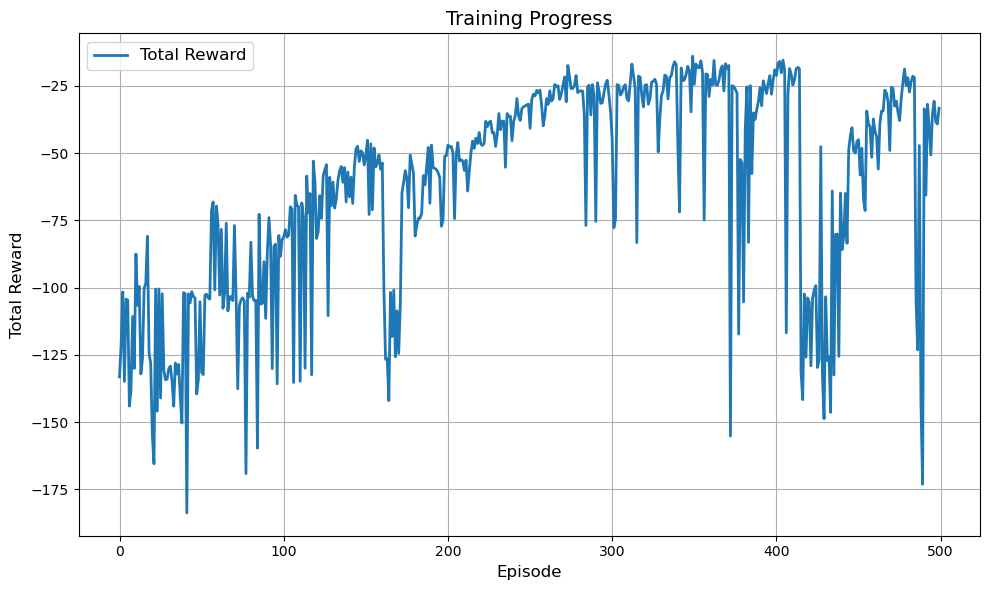

In [15]:
# Plot returns
returns= [-133.200325576802, -121.080741963369, -101.639871874505, -134.904855625607, -104.309315648392, -104.651190987828, -144.072504954722, -137.770270607757, -110.751272213155, -130.04341117358, -87.5478961479076, -106.651374394583, -99.6058373406982, -132.105991709946, -126.611611575876, -100.304603394065, -98.48931501847, -80.9416078162414, -124.325483728162, -128.281405102321, -155.018886252765, -165.500582038789, -100.554439835562, -145.950564098284, -100.533115525155, -141.050762775383, -102.332278396989, -130.791781690802, -134.253751831127, -134.064218707228, -130.078316359545, -129.214404579415, -134.949745130938, -144.097148114689, -128.04503707039, -132.145405926656, -128.582761571642, -140.69723762551, -150.363664953224, -101.905676161749, -102.267402405477, -183.753871381516, -102.346291071394, -105.709471208592, -101.558832828466, -103.32573564965, -103.907574023925, -139.563603019672, -134.195532281914, -105.279612561016, -131.584581698395, -132.350042064077, -102.842645358008, -102.493349966645, -103.837596108259, -104.304401648489, -71.5457515415914, -68.2042183500703, -100.866454895479, -69.6937894365163, -76.4093648364367, -102.787963226498, -78.374271574547, -107.696374131968, -102.050823915187, -76.0717160162702, -108.667213177956, -103.503891484204, -103.381412671523, -104.813597112523, -76.9499217271446, -103.331808765652, -137.626601390579, -106.802803569452, -104.549115419091, -103.83285937066, -105.016884932655, -169.164511947327, -102.029147652673, -103.600050912156, -83.1839472162615, -103.225469067903, -104.922452042579, -104.751699360582, -159.689128068138, -72.7772174875577, -106.159082891914, -105.885863478101, -90.3998237631644, -111.464014443963, -87.2148215893379, -73.990768727358, -84.1835925590616, -130.159916409365, -84.7246367976339, -83.8681590449744, -135.794121006366, -80.6528357941864, -88.4588449288062, -82.3423587642717, -81.1410598888964, -78.4912855729935, -81.2391400898453, -80.5747923341152, -69.9769662095221, -70.7487298655268, -135.279196563944, -65.7472124202359, -69.4831608178709, -69.928228719601, -134.830987265476, -68.5456367453025, -73.5480040501276, -129.967008728221, -58.5711172373986, -72.2924403505543, -65.0381192351401, -132.435019525041, -53.0034475716572, -60.7346676293813, -81.7615290651886, -79.159819931106, -65.8458552985269, -74.2909904930759, -58.5698985773303, -56.280269742748, -54.3229548370369, -110.466744583062, -59.0226755388033, -69.5951572042709, -60.8020212557275, -70.4884298613763, -67.0666827173341, -60.2459285844015, -56.6985206851583, -55.0229535161496, -60.8691096747725, -55.4348431884892, -68.1655550159731, -57.0333278602769, -66.3043175216695, -58.9535749274058, -68.7562688477253, -55.326247664771, -48.4994889149046, -47.4691690192082, -53.1640709183807, -49.1680566684973, -49.9719792821031, -54.434470015598, -50.8026657961169, -45.2683186659739, -72.8402501045075, -46.5583454550282, -71.1393483472154, -48.1050239893633, -55.1737284989756, -53.7651475459271, -50.7246869272349, -56.0789348858435, -53.7381673853535, -101.179782173225, -126.666661140382, -126.369531262605, -142.032790349624, -101.818680502743, -118.164524264652, -100.927601135636, -125.722879337831, -108.658626159828, -124.471654329854, -105.676979786124, -64.6777747739634, -60.909180544552, -56.542010384152, -59.4420055819386, -70.3368581614454, -50.7534653240653, -54.1004697409959, -57.510539077341, -80.8476306358465, -76.8633166778775, -74.1689653373837, -74.2638692708937, -72.3271039189359, -58.417144291811, -61.8463069529015, -55.2467709563681, -47.9276199793104, -68.6511931127, -47.060081355728, -55.443954749013, -55.7307653025393, -56.1605461299617, -57.2928949932586, -59.1023612802864, -77.199035058985, -75.0000509029059, -51.208886081486, -51.0669737690293, -47.0462425673773, -47.8412486374568, -47.5252857408437, -49.7825504354755, -74.3906518070851, -50.6783669980195, -46.1078961349571, -52.9746040846795, -52.5289644871106, -52.9448883360887, -56.4757034572065, -52.654310588702, -64.1265960673661, -56.6937418966145, -49.8207063762298, -45.5813472302085, -48.2636082903912, -44.5053133534789, -46.4580253623545, -42.3673678732241, -46.6763661720033, -47.1963253957816, -46.4029293080518, -38.2112284641409, -40.1904931646889, -38.5639848893614, -38.193335193038, -42.5226111212127, -42.3892749468723, -47.5597639034154, -43.1410192608175, -35.3236067240505, -41.3375456047412, -38.1514763186182, -38.168334458422, -55.2930133766142, -35.3247221251403, -36.4667726606274, -36.2969088841118, -45.4118970486199, -38.1271945177759, -36.0258650439208, -29.7365921926733, -36.2112522589502, -37.8951217165067, -33.4846581007912, -32.7988330093533, -32.5155696499936, -32.0682183747905, -31.8298137483832, -40.8027502689511, -30.1884684498178, -28.1493939589373, -28.7521190351446, -26.7395954645356, -27.6921233226122, -26.6217677813072, -32.0630629417522, -39.8859427789035, -36.1567598424281, -29.7883239335989, -31.8947048551942, -26.8874722712095, -30.7336179301384, -29.7815842708422, -24.5258897483447, -25.2918732627691, -24.9732384504873, -30.0964305965398, -28.0431971616731, -24.8888716375839, -21.7357566154493, -30.934137780868, -17.4343398182621, -21.5023307274027, -26.0640762319589, -25.9730827823423, -25.086943870206, -21.2019299312662, -27.5532561941152, -26.9751077405132, -26.8877807940001, -26.9544032697534, -35.7116685258685, -76.9299288984318, -25.461776888954, -24.777679564692, -35.843267739834, -24.5878680263801, -29.001685384379, -75.4182123465357, -23.8895732763838, -26.9520609306313, -31.5503902264484, -31.2773859436883, -27.5669499142623, -24.3071541483948, -22.9678249925002, -28.3875138728245, -34.6659214072202, -45.1376147029629, -77.7777320058139, -74.57281769616, -24.5753338537886, -24.8523155697981, -28.4546050249883, -27.5245808176529, -25.2598457858848, -24.62406787634, -29.887901508004, -30.64031059897, -23.9033889144968, -16.949370194363, -21.3334867213019, -26.0172882239315, -83.3145947735194, -21.3917391893918, -21.7737895168189, -28.4885197426595, -32.856127847346, -24.7773082582819, -24.6039686669757, -31.8681822919776, -29.803623370055, -23.6779559117219, -23.3342963727488, -22.606214416315, -24.3516033753094, -49.6115425963316, -37.2276124037683, -28.6855345427157, -26.8284045712375, -21.0405655804251, -21.4116581502251, -29.878622179978, -22.026130659572, -21.2710576924414, -17.7989449656753, -16.101052711062, -17.1473607755159, -47.7247252907939, -71.936738038323, -18.4017185610159, -23.1268842192918, -22.7966238608527, -20.8324903204763, -17.7852307164357, -19.3334852396497, -34.6924747197347, -14.0032577358669, -24.4293661908141, -16.9600004285392, -18.1798799698699, -18.2995534270057, -15.7518193075283, -20.0238938777011, -74.9045621185723, -20.6149983180319, -20.7476910595961, -28.9876205961685, -22.6623441334068, -24.7799354104144, -15.5858288705769, -24.6473516104046, -24.83665912266, -22.9727640387017, -19.1350869193883, -17.5953381841317, -26.911099788914, -16.8105012048593, -18.471789613261, -17.4746996088057, -155.193936418211, -24.9634286950831, -25.2738537961058, -26.331489209717, -27.7478542652527, -117.303481031322, -52.3968736075499, -53.6516781687343, -105.353108652106, -41.5992941734735, -25.407585064632, -83.2083190934152, -24.9618322309788, -57.6459480712088, -35.058314527504, -37.4978759637511, -33.8527688595216, -30.9505961962522, -25.7250328406293, -32.4556250310719, -23.1706627051692, -25.747820278267, -27.9023734610838, -23.9232098334828, -21.2381607507839, -28.1367845898008, -22.899617324462, -19.0476155504775, -21.1485472356235, -16.6748930336614, -15.9372587715081, -20.2096230226704, -15.4829224056662, -19.2800306036092, -116.8215419068, -27.8402394523017, -18.6109869871151, -20.7786851668618, -24.6506963349033, -22.7788936803414, -18.7839909081315, -18.174128117121, -18.629230843765, -131.453791581387, -141.663269002502, -102.388516988224, -125.864378635839, -103.858523915416, -105.496765146575, -129.090922658592, -103.975381115829, -100.932410644638, -99.3074306558886, -129.731510634265, -126.801550149507, -47.6564303379941, -132.267762991247, -148.744359286233, -103.429368874657, -127.069293780934, -125.736220959562, -146.365290019389, -64.0911085876989, -132.485400862541, -80.2247816866667, -80.1680606901197, -125.596531514939, -64.88255948366, -85.9302650638563, -81.0126774795328, -65.0134518539822, -83.548641444538, -48.8255960338254, -43.624358281042, -40.5888828071586, -49.127723431523, -50.0122736599112, -45.7621111339109, -45.0157529041366, -58.1688074049399, -48.210294603174, -67.0089429499446, -71.3742961374748, -34.4016081043047, -39.0321450515671, -40.3606974272008, -51.5773077670581, -37.3585660532762, -41.8150732571668, -44.0429110258672, -55.9502443525301, -38.9432411429814, -34.3868602917218, -34.3440548133985, -26.6214427081569, -27.7172403286123, -31.0216598270355, -49.0437297526658, -25.5271188674586, -25.967742147602, -32.5838998851707, -30.7446937783459, -34.8180844015187, -37.9339193592735, -29.7303837709227, -23.7422766770681, -18.782762091711, -24.9660929272621, -21.978241643854, -27.3410738603174, -23.4948734702194, -21.4505787891515, -21.8920639081546, -104.712111577459, -123.188700859456, -47.2237473432285, -142.786822514787, -173.093388053251, -33.5907226175571, -65.655664927736, -31.8598502825825, -40.1810582036538, -50.7279625520062, -35.708905191396, -30.7645887302786, -38.4165993971581, -39.2216229696562, -33.3393957545881]
import matplotlib.pyplot as plt
# Plot the total rewards
plt.figure(figsize=(10, 6))  # Optional: Resize the plot
plt.plot(returns, label="Total Reward", linewidth=2)
plt.xlabel("Episode", fontsize=12)
plt.ylabel("Total Reward", fontsize=12)
plt.title("Training Progress", fontsize=14)
plt.grid(True)  # Add grid for better readability
plt.legend(fontsize=12)  # Show the legend
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

# Using PPO algorithm to train the Bipedal Walker agent

In [ ]:
GAMMA_PPO = 0.99            # Discount factor
LAMBDA = 0.95           # GAE parameter
CLIP_EPS = 0.2          # Clip range for PPO
LR_PPO = 3e-4               # Learning rate
BATCH_SIZE_PPO = 64         # Minibatch size
EPOCHS = 10             # Number of training epochs 
HORIZON = 2048  